#1.Introduction
- what is the dataset about?
#####Its is the popular titanic dataset.
- what is the main goal of the analysis?
#####The main goal of this analysis is to practice and improve exploratory data analysis (EDA) skills.

#2.Load Data
- Import libraries
- Load the Dataset
- preview the data


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/train.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#3.Initial Overview
- Dataset Shape and types
- Summary statistics
- Missing values
- Duplicates

In [8]:
df.shape

(891, 12)

In [9]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [10]:
# for better overview (with nulls and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# to get summary stat
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# to get summary stat (for all cols include cat)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
# check for missing values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
# checking for duplicated
print(df.duplicated().sum())

0


In [15]:
print(df.duplicated(subset=['Name']).sum())
print(df.duplicated(subset=['Ticket']).sum())



0
210


In [16]:
df['Name'].nunique()

891

#4.Data Cleanning
- Handle missing values
- Fix data types
- Standardize or correct values
- Remove duplicates
- (Optional) Handle outliers

In [17]:
# filling age nulls with median
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipython-input-17-3314438962.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [18]:
# drop capin as it have high nulls
df.drop(columns='Cabin',inplace=True)

In [19]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-19-3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [20]:
# checking
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")


Number of outliers in Fare: 116


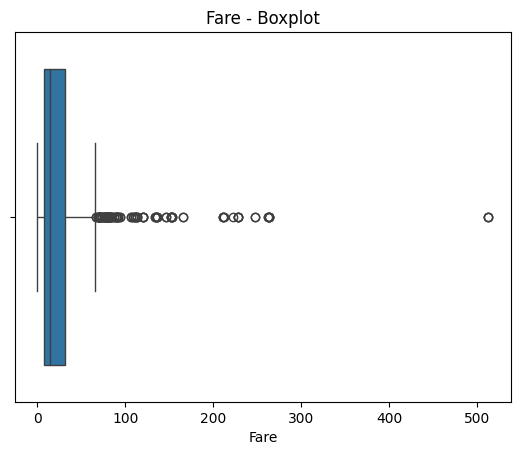

In [22]:
sns.boxplot(x=df['Fare'])
plt.title("Fare - Boxplot")
plt.show()


#5.Univariate Analysis
- Distribution of numerical features
- Frequency of categorical features
- Notes on skewness, imbalance, or unusual values

In [23]:
#for numberical cols we use histogram,distplot,histplot

<Axes: xlabel='Age', ylabel='Count'>

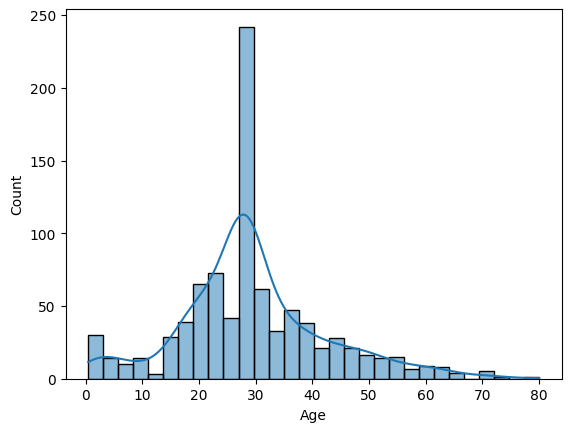

In [27]:
sns.histplot(df['Age'], bins=30, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

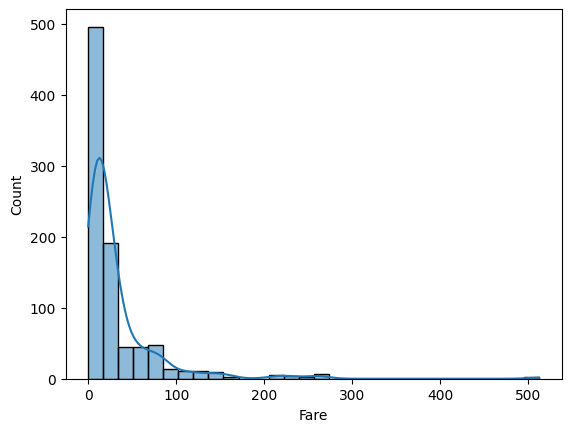

In [30]:
sns.histplot(df['Fare'], bins=30, kde=True)

<Axes: xlabel='SibSp', ylabel='Count'>

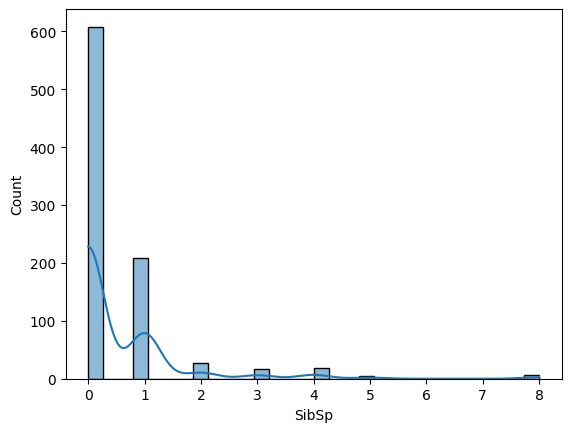

In [31]:
sns.histplot(df['SibSp'], bins=30, kde=True)

<Axes: xlabel='Parch', ylabel='Count'>

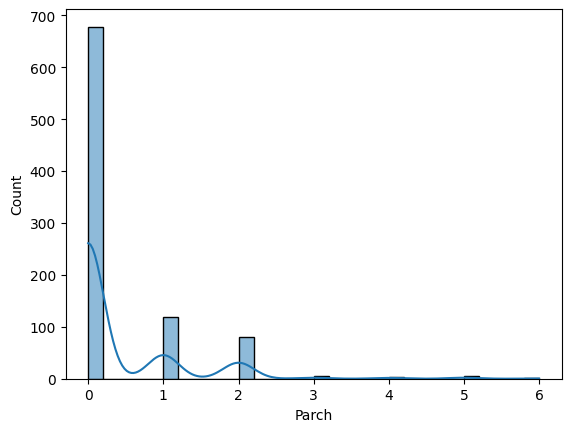

In [32]:
sns.histplot(df['Parch'], bins=30, kde=True)

<Axes: xlabel='Sex', ylabel='count'>

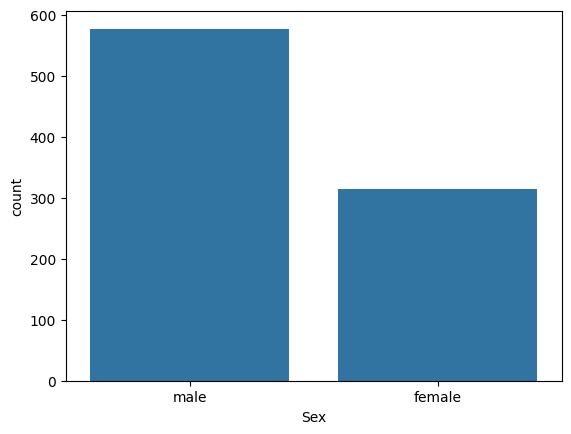

In [36]:
sns.countplot(x='Sex', data=df)

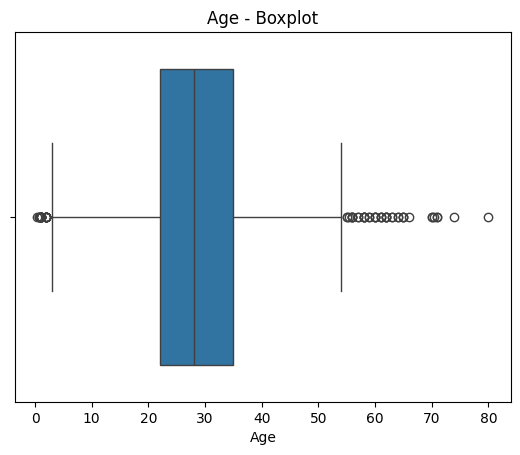

In [37]:
sns.boxplot(x=df['Age'])
plt.title("Age - Boxplot")
plt.show()


#6.Bivariate / Multivariate Analysis
- Relationship between features
- Correlation heatmap
- Boxplots, scatter plots, cross-tabs
Studying the relationship between two variables
####especially how independent variables relate to the target variable (like Survived in Titanic).

##Goals of Bivariate Analysis
-Understand how one feature impacts or relates to another

-Compare categorical vs target, numeric vs target

-Detect correlations, patterns, or predictive potential

-Guide feature selection for modeling

| Type                  | Look for                                       |
| --------------------- | ---------------------------------------------- |
| Categorical vs Target | Survival rates across categories               |
| Numerical vs Target   | Do survivors tend to have higher/lower values? |
| Numeric vs Numeric    | Correlations (positive or negative)            |


In [41]:
pd.crosstab(df['Sex'], df['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


In [42]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<Axes: xlabel='Sex', ylabel='Survived'>

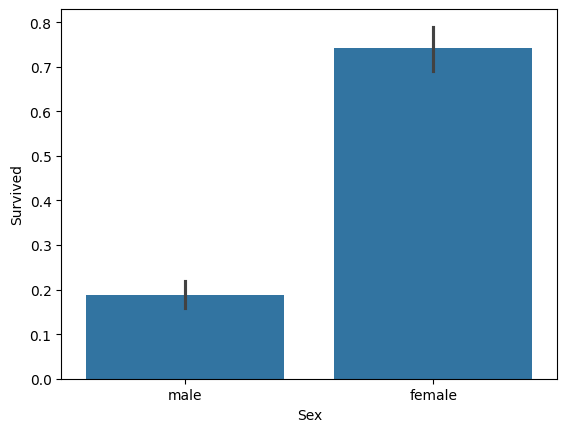

In [44]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

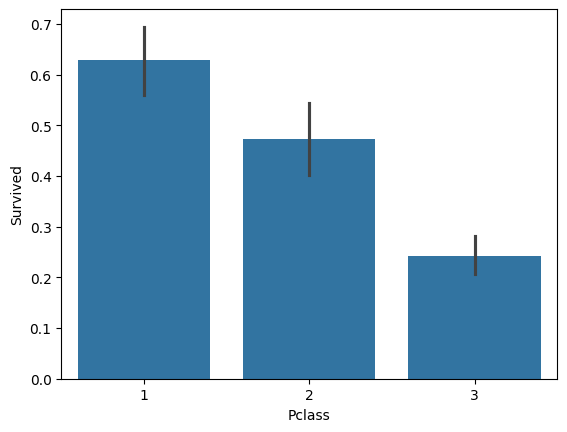

In [45]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [46]:
df.groupby('Survived')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


<Axes: xlabel='Survived', ylabel='Age'>

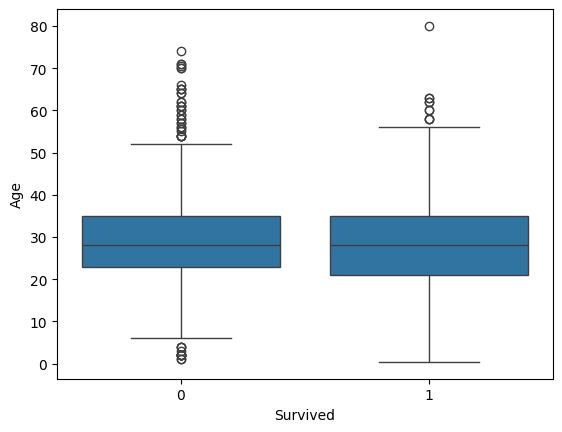

In [47]:
sns.boxplot(x='Survived', y='Age', data=df)

<Axes: xlabel='Survived', ylabel='Fare'>

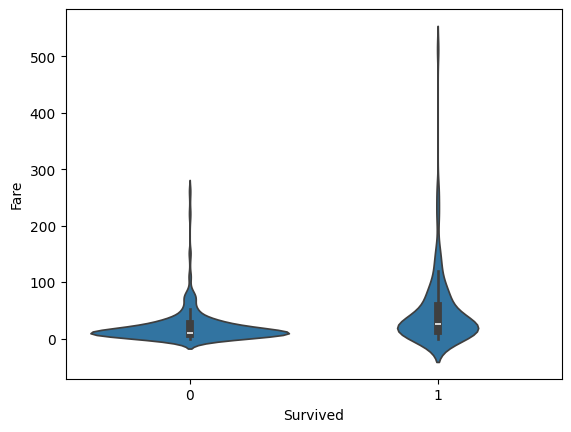

In [48]:
sns.violinplot(x='Survived', y='Fare', data=df)

<Axes: xlabel='Age', ylabel='Fare'>

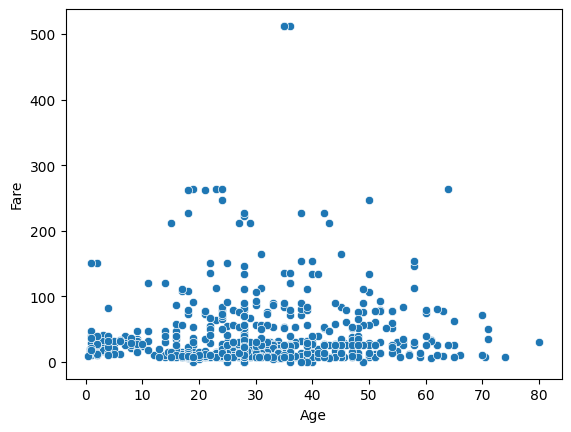

In [49]:
sns.scatterplot(x='Age', y='Fare', data=df)


In [50]:
df[['Age', 'Fare']].corr()


,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


#7.Key Insights
- What patterns or trends did you find?
- Any surprising or important relationships?
- Which features seem useful?

###  Target Variable (`Survived`)
- The dataset is **imbalanced**: approximately **38% survived**, **62% did not**.
- This imbalance should be addressed during modeling (e.g., using stratified sampling or class weighting).

---
###  Gender (`Sex`)
- **Females** had a much higher survival rate (~74%) compared to **males** (~19%).
- Strong predictor due to the "women and children first" evacuation policy.

---

###  Passenger Class (`Pclass`)
- **1st class** passengers had the highest survival rate.
- Survival decreases from **1st → 2nd → 3rd** class.
- Suggests class (and by extension, wealth/status) played a key role.

---

###  Fare
- `Fare` is **right-skewed** with significant outliers.
- Passengers who paid higher fares were more likely to survive.
- A **log transformation** (`log1p`) helps normalize the distribution and may improve model performance.

---

###  Age
- Age is nearly normal but has about **20% missing values**.
- Children (<16) had higher survival rates.
- Shows a **nonlinear relationship** with survival — consider binning or polynomial features.

---

###  Embarked Port (`Embarked`)
- Passengers embarking from port **C** had the highest survival rate.
- Port **S** was the most common, but had lower survival odds.
- Some missing values; feature may be informative in combination with class.

---

###  Family Size (`SibSp + Parch`)
- Passengers traveling **alone** had lower survival chances.
- Small families had better survival, while very large families were less likely to survive.
- Can engineer two new features: `FamilySize` and `IsAlone`.

---

###  Weak or Unused Features
- `PassengerId`, `Ticket`, and raw `Cabin` provide **little to no predictive power** in raw form.
- `Cabin` has ~77% missing values.
- `Name` is not directly useful, but extracting **titles** (Mr, Mrs, etc.) can add value.

---

### Final Feature Summary

| Feature         | Insight                                      |
|------------------|----------------------------------------------|
| `Sex`            | Strongest predictor of survival             |
| `Pclass`         | Strong ordinal relationship with survival   |
| `Fare_log`       | Skewed but informative; ties to `Pclass`    |
| `Age`            | Nonlinear; needs imputation                 |
| `Embarked`       | Weak but useful in combination              |
| `FamilySize`     | Useful derived feature                      |


#8.Next Steps
- What’s missing?
- What to explore further?
- Feature engineering or modeling ideas?